In [1]:
# import standard libraries
import glob
import re
# import third-party libraries
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
# import local libraries
from mlf import LinearRegressor, SVMRegressor, SVMClassifier

In [2]:
NUM_TOPICS = glob.glob(r'data/nlp/*.gensim')
NUM_TOPICS = [int(re.findall(r'\d+', s)[0]) for s in NUM_TOPICS]
NUM_DAYS = [2, 3, 5, 7, 14, 21, 28, 35, 42, 49, 56]

In [53]:
reg = SVMClassifier()
_, _ = reg.generate_xy(num_topics=20, num_days=3)
_ = reg.scale_x()

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/williammartin/Library/Mobile Documents/com~apple~CloudDocs/EPFL/3MA/Machine learning for finance/Project/mlf-project/mlf/mlf_utils.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan


In [54]:
pca = PCA(n_components=0.6, svd_solver='full')
pca = pca.fit(reg.X_scaled)
X = pca.transform(reg.X_scaled)
print(len(pca.explained_variance_ratio_))
pca.explained_variance_ratio_.cumsum()

12


array([0.08375319, 0.15065241, 0.20237169, 0.25149393, 0.3000761 ,
       0.34630992, 0.39206363, 0.43650991, 0.47872258, 0.52036133,
       0.56146403, 0.60189553])

sk = SelectKBest(score_func=fp_regression, k=10)
sk = sk.fit(reg.X_scaled, reg.y['y_bin'])
X = sk.transform(reg.X_scaled)

In [55]:
param_grid = {'C': [1, 10], #  0.001, 0.01, 0.1, 1, 10, 100 
              'gamma': [1, 10]} # 0.001, 0.01, 0.1, 1, 10, 100

# separate train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    reg.y['y_bin'],
                                                    test_size=0.3)

cv = GridSearchCV(reg, param_grid)
cv = cv.fit(X_train, y_train)
print(cv.score(X_train, y_train))
print(cv.score(X_test, y_test))

# reg = reg.fit(X_train, y_train)
# print(reg.score(X_train, y_train))
# print(reg.score(X_test, y_test))

0.9623307828134197
0.5516649502231377


In [56]:
c_opt = cv.best_estimator_.C
gamma_opt = cv.best_estimator_.gamma
print(c_opt)
print(gamma_opt)

10
1


In [3]:
all_models = []
for t in NUM_TOPICS:
    for d in NUM_DAYS:
        # create model
        reg = SVMClassifier(C=10, gamma=1)
        _, _ = reg.generate_xy(num_topics=t, num_days=d)
        _ = reg.scale_x()
        
        # perform PCA
        pca = PCA(n_components=0.6, svd_solver='full')
        pca = pca.fit(reg.X_scaled)
        X = pca.transform(reg.X_scaled)

        # separate train and test
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            reg.y['y_bin'],
                                                            test_size=0.3,
                                                            random_state=100,
                                                            stratify=reg.y['y_bin'])
        
        # train best model
        reg = reg.fit(X_train, y_train)
        reg.train_acc = reg.score(X_train, y_train)
        reg.test_acc = reg.score(X_test, y_test)
        
        all_models.append(reg)

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/williammartin/Library/Mobile Documents/com~apple~CloudDocs/EPFL/3MA/Machine learning for finance/Project/mlf-project/mlf/mlf_utils.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/williammartin/Library/Mobile Documents/com~apple~CloudDocs/EPFL/3MA/Machine learning for finance/Project/mlf-project/mlf/mlf_utils.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/williammartin/Library/Mobile Documents/com~apple~CloudDocs/EPFL/3MA/Machine learning for finance/Project/mlf-project/mlf/mlf_utils.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/williammartin/Library/Mobile Documents/com~apple~CloudDocs/EPFL/3MA/Machine learning for finance/Project/mlf-project/mlf/mlf_utils.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/williammartin/Library/Mobile Documents/com~apple~CloudDocs/EPFL/3MA/Machine learning for finance/Project/mlf-project/mlf/mlf_utils.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:

In [4]:
all_scores = pd.DataFrame(columns=['num_topics', 'num_days', 'train', 'test'])
all_scores['num_topics'] = [m.num_topics for m in all_models]
all_scores['num_days'] = [m.num_days for m in all_models]
all_scores['train'] = [m.train_acc for m in all_models]
all_scores['test'] = [m.test_acc for m in all_models]

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


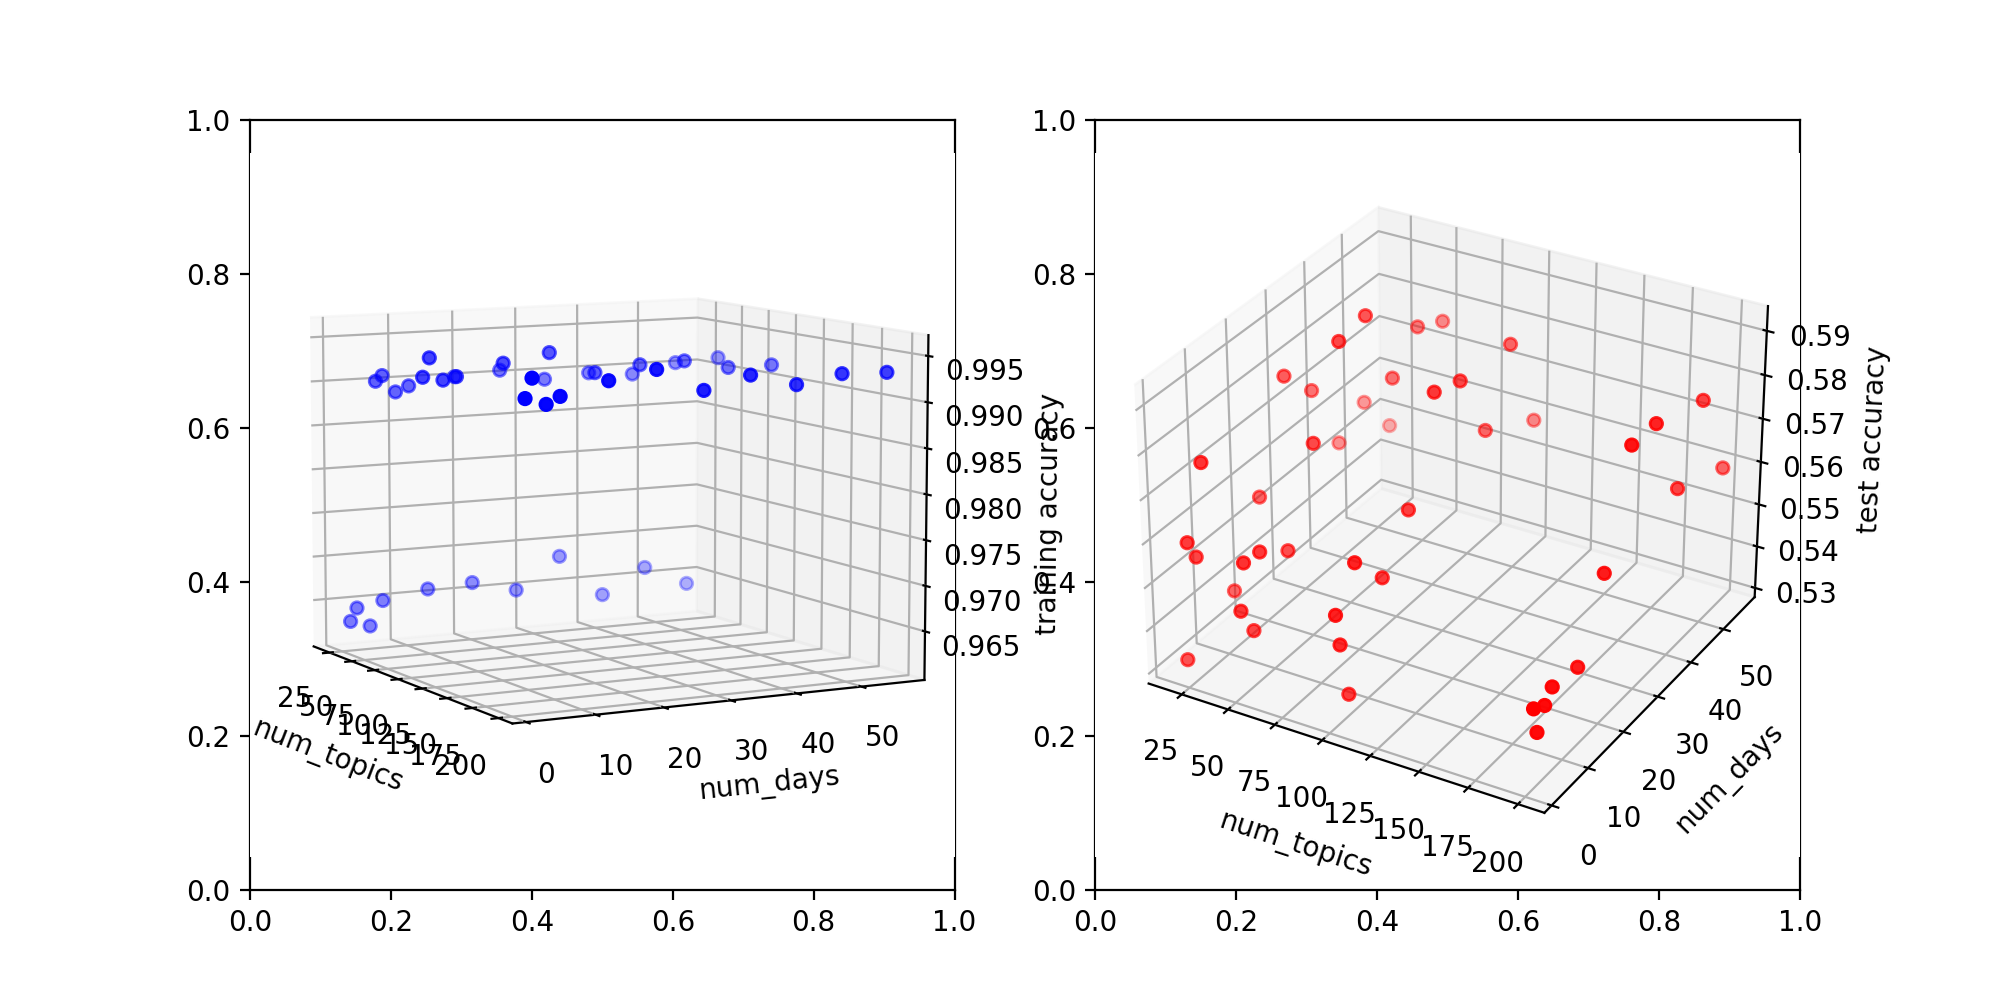

Text(0.5, 0, 'test accuracy')

In [8]:
fig, ax = plt.subplots(figsize=[10, 5], nrows=1, ncols=2)

ax = fig.add_subplot(121, projection='3d')
ax.scatter(all_scores['num_topics'], all_scores['num_days'], all_scores['train'], c='blue')
ax.set_xlabel("num_topics")
ax.set_ylabel("num_days")
ax.set_zlabel("training accuracy")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(all_scores['num_topics'], all_scores['num_days'], all_scores['test'], c='red')
ax.set_xlabel("num_topics")
ax.set_ylabel("num_days")
ax.set_zlabel("test accuracy")

In [ ]:
plt.